## Load the network constructor object

In [1]:
from plastic_network_prefixes import PlasticPrefixNetwork

## Teach a few thousand words

learning word 0/10...
LEARNING:  >emma_
---END---
learning word 1/10...
LEARNING:  >olivia_
PREFIX COUNT :  {'>': {'count': 1, 'matches': ['>emma_']}}
CHECKING :  >
one level down doesn't exist, hence inserting at one level down.
insert >  at r_level -1 ...
adding node :  >  with data  {'count': 1, 'r_level': -1}
adding node :  >olivia_  with data  {'count': 0, 'r_level': 0}
adding edge :  >  ->  >olivia_  with data  {}
adding edge :  >  ->  >emma_  with data  {}
LIFTING R at:  >
LIFTING R at:  >olivia_
LIFTING R at:  >emma_
POTENTIATING at:  >olivia_
POTENTIATING at:  >
---END---
learning word 2/10...
LEARNING:  >ava_
PREFIX COUNT :  {'>': {'count': 2, 'matches': ['>emma_', '>olivia_']}}
CHECKING :  >
one level down does exist, hence finding out if should insert there or not
insert >  at r_level 0 ...
removing edge :  >  ->  >olivia_
removing edge :  >  ->  >emma_
adding node :  >  with data  {'count': 1, 'r_level': 0}
adding node :  >ava_  with data  {'count': 0, 'r_level': 1}
adding

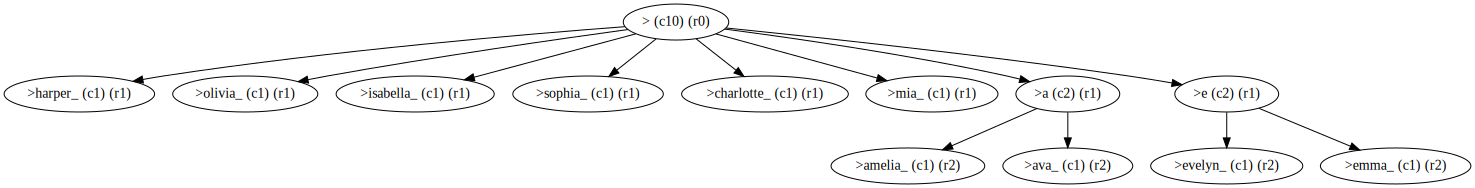

In [2]:
constructor = PlasticPrefixNetwork()
words = open("names.txt", "r").read().splitlines()[:10]
samples = [">" + x + "_" for x in words]
# words = [">rohan_", ">rohit_", ">rohu_", ">mohan_",">rohit_", ">roham_", ">mohag_"]
for i, word in enumerate(samples):
    print(f"learning word {i}/{len(samples)}...")
    constructor.learn(word)
constructor.visualize(with_counts=True, with_r_levels=True)

## Load an existing graph

In [3]:
constructor_new = PlasticPrefixNetwork()
constructor_new.load("32k_words.gpickle")

In [5]:
from utils import format_and_write_csv
format_and_write_csv(constructor_new.graph)

Writing complete
Writing complete


### Run an inference

REFACTORINGS:
STEP 0  --  >
FOUND!  0 ['>'] >
FIRST R LEVEL:  ['>']
STEP 1  --  >
EXACT MATCH FOUND. FORWARDING.
STEP 2  --  >
DESCENDANT: >harper_
DESCENDANT: >olivia_
DESCENDANT: >isabella_
DESCENDANT: >sophia_
DESCENDANT: >charlotte_
DESCENDANT: >mia_
DESCENDANT: >a
DESCENDANT: >e


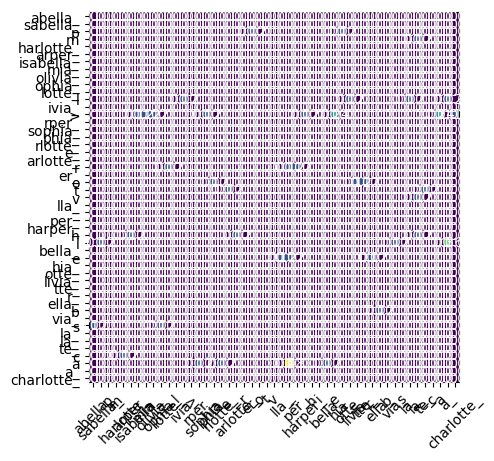

--- inferring for :  [13]
SAMPLES:  ['abella_', 'sabella_', 'p', 'm', 'harlotte_', 'arper_', 'isabella_', 'mia_', 'olivia_', 'ophia_', 'lotte_', 'l', 'ivia_', '>', 'rper_', 'sophia_', 'phia_', 'rlotte_', 'e_', 'arlotte_', 'r', 'er_', 'o', 't', 'v', 'lla_', '_', 'per_', 'harper_', 'h', 'i', 'bella_', 'e', 'hia_', 'otte_', 'livia_', 'tte_', 'r_', 'ella_', 'b', 'via_', 's', 'la_', 'ia_', 'te_', 'c', 'a', 'a_', 'charlotte_']
INFERENCE VECTOR: {'>': 1.0}
TESTING: [[0.         0.         0.         0.         0.         0.
  0.11952286 0.11952286 0.11952286 0.         0.         0.
  0.         0.         0.         0.11952286 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.11952286 0.
  0.         0.         0.23904572 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.23904572 0.
  0.11952286]] ['abella_', 'sabella_', 'p', 'm', 'harlott

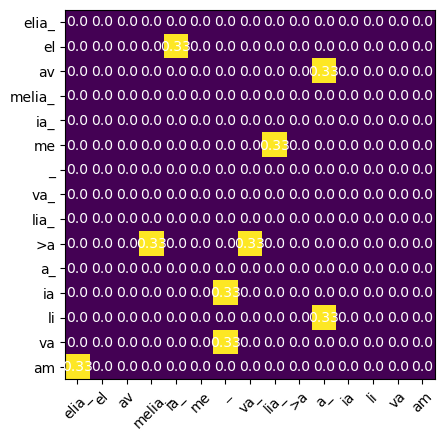

--- inferring for :  [9]
SAMPLES:  ['elia_', 'el', 'av', 'melia_', 'ia_', 'me', '_', 'va_', 'lia_', '>a', 'a_', 'ia', 'li', 'va', 'am']
INFERENCE VECTOR: {'>a': 1.0}
TESTING: [[0.         0.         0.         0.33333333 0.         0.
  0.         0.33333333 0.         0.         0.         0.
  0.         0.         0.        ]] ['elia_', 'el', 'av', 'melia_', 'ia_', 'me', '_', 'va_', 'lia_', '>a', 'a_', 'ia', 'li', 'va', 'am']
INFERENCE RESULT: {'melia_': 0.3333333333333333, 'va_': 0.3333333333333333}
--- inference ended
['melia_', 'va_']
get_next_inference_string:  va_ {'melia_': 0.3333333333333333, 'va_': 0.3333333333333333}
END RESULT:  >ava_


In [3]:
constructor.infer(">")

## View learning times

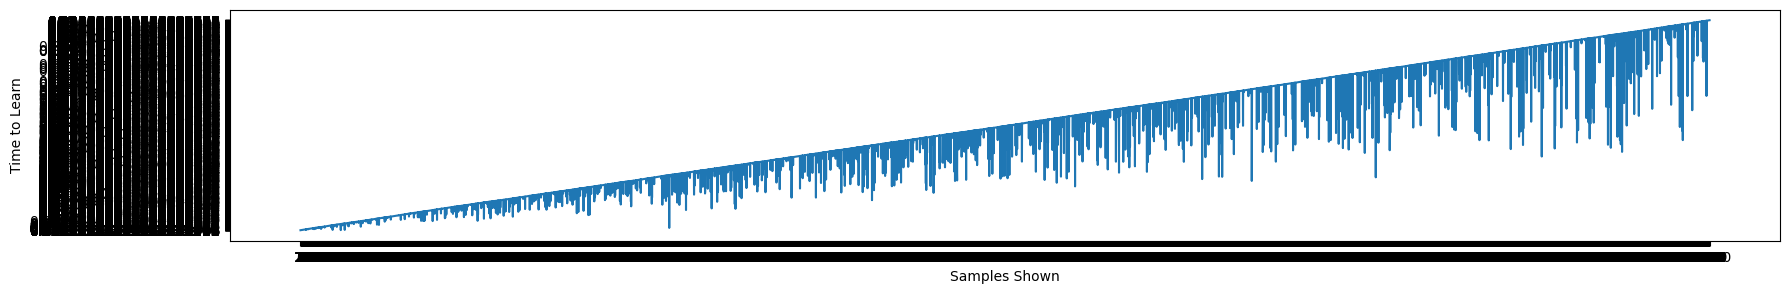

In [14]:
import csv
x_axis = []
y_axis = []
i = 0
limit = 10000
with open('32k_learning_times.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        x_axis.append(row['samples_shown'])
        y_axis.append(row['learning_time'])
        i += 1
        if i > limit:
            break

import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (20,3)
# Plot the line graph
plt.plot(x_axis, y_axis)

# Add x and y labels
plt.xlabel('Samples Shown')
plt.ylabel('Time to Learn')

# Show the plot
plt.show()
